This is one of the Objectiv [example notebooks](https://objectiv.io/docs/modeling/example-notebooks/). These notebooks can run [on your own data](https://objectiv.io/docs/modeling/get-started-in-your-notebook/), or you can instead run the [Demo](https://objectiv.io/docs/home/quickstart-guide/) to quickly try them out.

# Basic product analytics

This example notebook shows how you can easily do basic product analytics on your data. [See here how to get started in your notebook](https://objectiv.io/docs/modeling/get-started-in-your-notebook/).

## Setup
We first have to instantiate the model hub and an Objectiv DataFrame object.

In [38]:
from modelhub import ModelHub
from bach import display_sql_as_markdown
from datetime import datetime

# instantiate the model hub and set the default time aggregation to daily
modelhub = ModelHub(time_aggregation='%Y-%m-%d')
# get a Bach DataFrame with Objectiv data within a defined timeframe
df = modelhub.get_objectiv_dataframe(start_date='2022-02-01', end_date='2022-06-30')

In [39]:
# The columns 'global_contexts' and the 'location_stack' contain most of the event specific data. These columns are json type 
# columns and we can extract data from it based on the keys of the json objects using `SeriesGlobalContexts` or 
# `SeriesLocationStack` methods to extract the data.

# add 'application', 'feature_nice_name' and 'root_location' as columns, so that we can use it for grouping etc later
df['application'] = df.global_contexts.gc.application
df['feature_nice_name'] = df.location_stack.ls.nice_name
df['root_location'] = df.location_stack.ls.get_from_context_with_type_series(type='RootLocationContext', key='id')

### Have a look at the data

In [40]:
# sort by users sessions
df.sort_values(['session_id', 'session_hit_number'], ascending=False).head()

,day,moment,user_id,global_contexts,location_stack,event_type,stack_event_types,session_id,session_hit_number,application,feature_nice_name,root_location
event_id,,,,,,,,,,,,
96b5e709-bb8a-46de-ac82-245be25dac29,2022-06-30,2022-06-30 21:40:32.401,2d718142-9be7-4975-a669-ba022fd8fd48,"[{'id': 'http_context', '_type': 'HttpContext'...","[{'id': 'home', '_type': 'RootLocationContext'...",VisibleEvent,"[AbstractEvent, NonInteractiveEvent, VisibleEv...",5325,3,objectiv-website,Overlay: star-us-notification-overlay located ...,home
252d7d87-5600-4d90-b24f-2a6fb8986c5e,2022-06-30,2022-06-30 21:40:30.117,2d718142-9be7-4975-a669-ba022fd8fd48,"[{'id': 'http_context', '_type': 'HttpContext'...","[{'id': 'home', '_type': 'RootLocationContext'...",PressEvent,"[AbstractEvent, InteractiveEvent, PressEvent]",5325,2,objectiv-website,Pressable: after located at Root Location: hom...,home
157a3000-bbfc-42e0-b857-901bd578ea7c,2022-06-30,2022-06-30 21:40:16.908,2d718142-9be7-4975-a669-ba022fd8fd48,"[{'id': 'http_context', '_type': 'HttpContext'...","[{'id': 'home', '_type': 'RootLocationContext'...",PressEvent,"[AbstractEvent, InteractiveEvent, PressEvent]",5325,1,objectiv-website,Pressable: after located at Root Location: hom...,home
8543f519-d3a4-4af6-89f5-cb04393944b8,2022-06-30,2022-06-30 20:43:50.962,bb127c9e-3067-4375-9c73-cb86be332660,"[{'id': 'http_context', '_type': 'HttpContext'...","[{'id': 'home', '_type': 'RootLocationContext'...",MediaLoadEvent,"[AbstractEvent, MediaEvent, MediaLoadEvent, No...",5324,2,objectiv-website,Media Player: 2-minute-video located at Root L...,home
a0ad4364-57e0-4da9-a266-057744550cc2,2022-06-30,2022-06-30 20:43:49.820,bb127c9e-3067-4375-9c73-cb86be332660,"[{'id': 'http_context', '_type': 'HttpContext'...","[{'id': 'home', '_type': 'RootLocationContext'...",ApplicationLoadedEvent,"[AbstractEvent, ApplicationLoadedEvent, NonInt...",5324,1,objectiv-website,Root Location: home,home


In [41]:
# explore the data with describe
df.describe(include='all').head()

,day,moment,user_id,global_contexts,location_stack,event_type,stack_event_types,session_id,session_hit_number,application,feature_nice_name,root_location
__stat,,,,,,,,,,,,
count,35808,35808,35808,35808,35808,35808,35808,35808.00,35808.00,35808,35808,35808
mean,None,None,None,None,None,None,None,2693.79,14.15,None,None,None
std,None,None,None,None,None,None,None,1535.81,29.77,None,None,None
min,2022-02-01,2022-02-01 01:16:28.924,None,None,None,ApplicationLoadedEvent,None,1.00,1.00,objectiv-docs,Content: hero located at Root Location: home,about
max,2022-06-30,2022-06-30 21:40:32.401,None,None,None,VisibleEvent,None,5325.00,396.00,objectiv-website,Root Location: tracking,tracking


### Reference
* [modelhub.ModelHub.get_objectiv_dataframe](https://objectiv.io/docs/modeling/open-model-hub/api-reference/ModelHub/get_objectiv_dataframe/)
* [modelhub.SeriesGlobalContexts.gc](https://objectiv.io/docs/modeling/open-model-hub/api-reference/SeriesGlobalContexts/gc/)
* [bach.DataFrame.sort_values](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/sort_values/)
* [bach.DataFrame.describe](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/describe/)
* [bach.DataFrame.head](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/head/)

Next we'll go though a selection of product analytics metrics. We can use models from the [open model hub](https://objectiv.io/docs/modeling/open-model-hub/), or use [modeling library Bach](https://objectiv.io/docs/modeling/bach/) to run data analyses directly on the data store, with Pandas-like syntax.

For each example, [`head()`](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/head/), [`to_pandas()`](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/to_pandas/) or [`to_numpy()`](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/to_numpy/) can be used to execute the generated SQL and get the results in your notebook.

## Unique users
Let's see the number of unique users over time, with the [unique_users](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/unique_users/) model. By default it will use the `time_aggregation` set when the model hub was instantiated, in this case '%Y-%m-%d', so daily. For `monthly_users`, the default time_aggregation is
overridden by using a different `groupby` argument.

In [42]:
# unique users, monthly
monthly_users = modelhub.aggregate.unique_users(df, groupby=modelhub.time_agg(df, '%Y-%m'))
monthly_users.sort_index(ascending=False).head()

time_aggregation
2022-06     497
2022-05    1682
2022-04     304
2022-03     288
2022-02     596
Name: unique_users, dtype: int64

In [43]:
# unique users, daily
daily_users = modelhub.aggregate.unique_users(df)
daily_users.sort_index(ascending=False).head(10)

time_aggregation
2022-06-30    20
2022-06-29    16
2022-06-28    19
2022-06-27    16
2022-06-26     4
2022-06-25    13
2022-06-24    21
2022-06-23    31
2022-06-22    50
2022-06-21    60
Name: unique_users, dtype: int64

To see the number of users per main product section, group by its [root_location](https://objectiv.io/docs/taxonomy/reference/location-contexts/RootLocationContext).

In [44]:
# unique users, per main product section
users_root = modelhub.aggregate.unique_users(df, groupby=['application', 'root_location'])
users_root.sort_index(ascending=False).head(10)

application       root_location
objectiv-website  privacy            10
                  join-slack         32
                  jobs              263
                  home             2488
                  cla                 2
                  blog              556
                  about             346
objectiv-docs     tracking          270
                  taxonomy          413
                  modeling          359
Name: unique_users, dtype: int64

### Reference
* [modelhub.Aggregate.unique_users](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/unique_users/)
* [bach.DataFrame.sort_index](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/sort_index/)
* [bach.DataFrame.head](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/head/)

## Retention

To measure how well we are doing at keeping users with us after their first interaction, we can use a retention matrix.

To calculate the retention matrix, we need to distribute the users into mutually exclusive cohorts based on the `time_period` (can be `daily`, `weekly`, `monthly`, or `yearly`) they first interacted.

In the retention matrix:
- each row represents a cohort;
- each column represents a time range, where time is calculated with respect to the cohort start time;
- the values of the matrix elements are the number or percentage (depending on `percentage` parameter) of users in a given cohort that returned again in a given time range.

The users' activity starts to be counted from the `start_date` specified when the modelhub was instantiated.

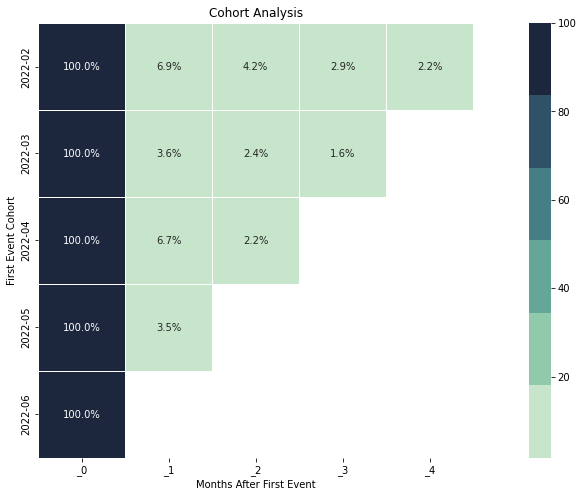

,_0,_1,_2,_3,_4
first_cohort,,,,,
2022-02,100.0,6.879195,4.194631,2.852349,2.181208
2022-03,100.0,3.643725,2.429150,1.619433,NaN
2022-04,100.0,6.666667,2.222222,NaN,NaN
2022-05,100.0,3.473492,NaN,NaN,NaN
2022-06,100.0,NaN,NaN,NaN,NaN


In [45]:
# retention matrix, monthly, with percentages
retention_matrix = modelhub.aggregate.retention_matrix(df, time_period='monthly', percentage=True, display=True)
retention_matrix.head()

### Drilling down retention cohorts

In the retention matrix above, we can see there's a drop in retained users in the second cohort the next month; just 3.6% of users returned. We can directly zoom into the different cohorts and see the difference.

In [46]:
# calculate the first cohort
cohorts = df[['user_id', 'moment']].groupby('user_id')['moment'].min().reset_index()
cohorts = cohorts.rename(columns={'moment': 'first_cohort'})

# add first cohort of the users to our DataFrame
df_with_cohorts = df.merge(cohorts, on='user_id')

In [47]:
# filter data where users belong to the #0 cohort
cohort0_filter = (df_with_cohorts['first_cohort'] > datetime(2022, 2, 1)) & (df_with_cohorts['first_cohort'] < datetime(2022, 3, 1))
df_with_cohorts[cohort0_filter]['event_type'].value_counts().head()

event_type
VisibleEvent              3678
PressEvent                3163
ApplicationLoadedEvent    2487
MediaLoadEvent            1158
MediaStartEvent            535
Name: value_counts, dtype: int64

In [48]:
# filter data where users belong to the #1 cohort (the problematic one)
cohort1_filter = (df_with_cohorts['first_cohort'] > datetime(2022, 3, 1)) & (df_with_cohorts['first_cohort'] < datetime(2022, 4, 1))
df_with_cohorts[cohort1_filter]['event_type'].value_counts().head()

event_type
PressEvent                765
VisibleEvent              686
ApplicationLoadedEvent    547
MediaLoadEvent            270
HiddenEvent                92
Name: value_counts, dtype: int64

One interesting thing to note here, for example, is that there are relatively more [`VisibleEvents`](https://objectiv.io/docs/taxonomy/reference/events/VisibleEvent) in the first cohort than in the second 'problematic' one.

This is  just a simple example to demonstrate the differences you can find between cohorts. You could run other models like [top product features](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/top_product_features/), or develop more in-depth analyses.

### Reference
* [modelhub.Aggregate.retention_matrix](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/retention_matrix/)
* [bach.DataFrame.groupby](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/groupby/)
* [bach.DataFrame.min](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/min/)
* [bach.DataFrame.reset_index](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/reset_index/)
* [bach.DataFrame.rename](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/rename/)
* [bach.DataFrame.merge](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/merge/)
* [bach.DataFrame.value_counts](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/value_counts/)
* [bach.DataFrame.head](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/head/)

## Time spent (aka duration)
Here we calculate the average duration of a user's session, using the [session_duration model](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/session_duration/).

In [49]:
# duration, monthly average
duration_monthly = modelhub.aggregate.session_duration(df, groupby=modelhub.time_agg(df, '%Y-%m'))
duration_monthly.sort_index(ascending=False).head()

time_aggregation
2022-06   0 days 00:02:54.086814
2022-05   0 days 00:02:58.417140
2022-04   0 days 00:03:02.069818
2022-03   0 days 00:04:24.103417
2022-02   0 days 00:03:32.650353
Name: session_duration, dtype: timedelta64[ns]

In [50]:
# duration, daily average
duration_daily = modelhub.aggregate.session_duration(df)
duration_daily.sort_index(ascending=False).head()

time_aggregation
2022-06-30   0 days 00:01:40.354000
2022-06-29   0 days 00:04:11.683833
2022-06-28   0 days 00:01:42.213783
2022-06-27   0 days 00:05:15.880143
2022-06-26   0 days 00:00:12.542250
Name: session_duration, dtype: timedelta64[ns]

 To see the average time spent by users in each main product section (per month in this case), group by its [root_location](https://objectiv.io/docs/taxonomy/reference/location-contexts/RootLocationContext).

In [51]:
# duration, monthly average per root_location
duration_root_month = modelhub.aggregate.session_duration(df, groupby=['application', 'root_location', modelhub.time_agg(df, '%Y-%m')]).sort_index()
duration_root_month.head(10)

application    root_location  time_aggregation
objectiv-docs  docs           2022-02            0 days 00:04:43.481229
               home           2022-02            0 days 00:04:55.833541
                              2022-03            0 days 00:03:15.469159
                              2022-04            0 days 00:02:24.079984
                              2022-05            0 days 00:02:28.704679
                              2022-06            0 days 00:01:28.630640
               modeling       2022-02            0 days 00:05:02.093571
                              2022-03            0 days 00:07:10.507312
                              2022-04            0 days 00:05:22.437091
                              2022-05            0 days 00:04:39.967000
Name: session_duration, dtype: timedelta64[ns]

In [52]:
# how is the overall time spent distributed?
session_duration = modelhub.aggregate.session_duration(df, groupby='session_id', exclude_bounces=False)
# materialization is needed because the expression of the created Series contains aggregated data, and it is not allowed to aggregate that.
session_duration.materialize().quantile(q=[0.25, 0.50, 0.75]).head()

q
0.25   0 days 00:00:00.480000
0.50   0 days 00:00:06.885000
0.75   0 days 00:01:19.166000
Name: session_duration, dtype: timedelta64[ns]

### Reference
* [modelhub.Aggregate.session_duration](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/session_duration/)
* [bach.DataFrame.sort_index](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/sort_index/)
* [bach.DataFrame.head](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/head/)
* [bach.DataFrame.groupby](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/groupby/)
* [bach.DataFrame.materialize](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/materialize/)

## Top used product features

To see which features are most used, we can use the [top_product_features model](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/top_product_features/). 

In [53]:
# see top used product features - by default we select only user actions (InteractiveEvents)
top_product_features = modelhub.aggregate.top_product_features(df)
top_product_features.head()

user_id_nunique
application      feature_nice_name                                  event_type                 
objectiv-website Pressable: after located at Root Location: home... PressEvent              501
                 Pressable: after located at Root Location: home... PressEvent              301
                 Pressable: before located at Root Location: hom... PressEvent              276
                 Pressable: hamburger located at Root Location: ... PressEvent              274
                 Link: about-us located at Root Location: home =... PressEvent              269

### Top used features per product area
We also want to look at which features were used most in our top product areas.

In [54]:
# select only user actions, so stack_event_types must contain 'InteractiveEvent'
interactive_events = df[df.stack_event_types.json.array_contains('InteractiveEvent')]
# from these interactions, get the number of unique users per application, root_location, feature, and event type.
top_interactions = modelhub.agg.unique_users(interactive_events, groupby=['application','root_location','feature_nice_name', 'event_type'])
top_interactions = top_interactions.reset_index()

In [55]:
# let's look at the homepage on our website
home_users = top_interactions[(top_interactions.application == 'objectiv-website') &
                              (top_interactions.root_location == 'home')]
home_users.sort_values('unique_users', ascending=False).head()

,application,root_location,feature_nice_name,event_type,unique_users
0,objectiv-website,home,Pressable: after located at Root Location: hom...,PressEvent,501
1,objectiv-website,home,Pressable: after located at Root Location: hom...,PressEvent,301
2,objectiv-website,home,Pressable: before located at Root Location: ho...,PressEvent,276
3,objectiv-website,home,Pressable: hamburger located at Root Location:...,PressEvent,274
4,objectiv-website,home,Link: about-us located at Root Location: home ...,PressEvent,269


From the same `top_interactions` object, we can see the top used features on our documentation, which is a separate application.

In [56]:
# see the top used features on our documentation application
docs_users = top_interactions[top_interactions.application == 'objectiv-docs']
docs_users.sort_values('unique_users', ascending=False).head()

,application,root_location,feature_nice_name,event_type,unique_users
0,objectiv-docs,home,Link: Quickstart Guide located at Root Locatio...,PressEvent,96
1,objectiv-docs,home,Link: logo located at Root Location: home => N...,PressEvent,65
2,objectiv-docs,home,Link: Tracking located at Root Location: home ...,PressEvent,64
3,objectiv-docs,modeling,Link: Taxonomy located at Root Location: model...,PressEvent,62
4,objectiv-docs,modeling,Link: Tracking located at Root Location: model...,PressEvent,60


### Reference
* [modelhub.Aggregate.top_product_features](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/top_product_features/)
* [bach.SeriesJson.json.array_contains](https://objectiv.io/docs/modeling/bach/api-reference/Series/Json/json/#array_contains)
* [modelhub.Aggregate.unique_users](https://objectiv.io/docs/modeling/open-model-hub/models/aggregation/unique_users/)
* [bach.DataFrame.reset_index](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/reset_index/)
* [bach.DataFrame.sort_values](https://objectiv.io/docs/modeling/bach/api-reference/DataFrame/sort_values/)

## Conversions
Users have impact on product goals, e.g. conversion to a signup. Here we look at their conversion to such goals. First you define a conversion event, which in this example we've defined as clicking a link to our GitHub repo.

In [57]:
# create a column that extracts all location stacks that lead to our GitHub repo
df['github_press'] = df.location_stack.json[{'id': 'objectiv-on-github', '_type': 'LinkContext'}:]
df.loc[df.location_stack.json[{'id': 'github', '_type': 'LinkContext'}:]!=[],'github_press'] = df.location_stack
# define which events to use as conversion events
modelhub.add_conversion_event(location_stack=df.github_press,
                              event_type='PressEvent',
                              name='github_press')

This conversion event can then be used by several models using the defined name ('github_press'). First we calculate the number of unique converted users.

In [58]:
# number of conversions, daily
df['is_conversion_event'] = modelhub.map.is_conversion_event(df, 'github_press')
conversions = modelhub.aggregate.unique_users(df[df.is_conversion_event])
conversions.to_frame().sort_index(ascending=False).head(10)

,unique_users
time_aggregation,
2022-06-27,1
2022-06-24,2
2022-06-21,2
2022-06-19,1
2022-06-17,1
2022-06-16,1
2022-06-14,1
2022-06-10,2
2022-06-07,1


### Conversion rate
To calculate the daily conversion rate, we use the earlier created `daily_users` DataFrame.

In [59]:
# conversion rate, daily
conversion_rate = conversions / daily_users
conversion_rate.sort_index(ascending=False).head(10)

time_aggregation
2022-06-30         NaN
2022-06-29         NaN
2022-06-28         NaN
2022-06-27    0.062500
2022-06-26         NaN
2022-06-25         NaN
2022-06-24    0.095238
2022-06-23         NaN
2022-06-22         NaN
2022-06-21    0.033333
Name: unique_users, dtype: float64

### Conversion by product feature
Let's understand which product features are used most by converted users.

In [63]:
# TODO
conversion_locations = modelhub.agg.unique_users(df[df.is_conversion_event], 
                                                 groupby=['application', 'feature_nice_name', 'event_type'])

# calling .to_frame() for nicer formatting
conversion_locations.sort_values(ascending=False).to_frame().head()

unique_users
application      feature_nice_name                                  event_type              
objectiv-website Link: github located at Root Location: home => ... PressEvent            71
                 Link: github located at Root Location: home => ... PressEvent            32
                 Link: objectiv-on-github located at Root Locati... PressEvent            19
                 Link: objectiv-on-github located at Root Locati... PressEvent            11
                 Link: github located at Root Location: blog => ... PressEvent             6

## Events before conversion
We can calculate what users did _before_ converting.

In [ ]:
top_features_before_conversion = modelhub.agg.top_product_features_before_conversion(df_acquisition, name='github_press')
top_features_before_conversion.head()

### Time spent before conversion
At last we want to know how much time users that converted spent on our site before they converted.

In [ ]:
# label sessions with a conversion
df_acquisition['converted_users'] = modelhub.map.conversions_counter(df_acquisition, name='github_press') >= 1

# label hits where at that point in time, there are 0 conversions in the session
df_acquisition['zero_conversions_at_moment'] = modelhub.map.conversions_in_time(df_acquisition, 'github_press') == 0

# filter on above created labels
converted_users = df_acquisition[(df_acquisition.converted_users & df_acquisition.zero_conversions_at_moment)]

# how much time do users spend before they convert?
modelhub.aggregate.session_duration(converted_users, groupby=None).to_frame().head()

We create a copy of the original df, as to not clutter our original df with columns that are only required for acquisition analysis. 

## TODO: Funnels

## TODO: Marketing

## Get the SQL for any analysis

In [ ]:
# just one analysis as an example, this works for anything you do with Objectiv Bach
display_sql_as_markdown(conversions)